In [ ]:
!pip install pandas-datareader
!pip install yfinance

     |████████████████████████████████| 5.5MB 6.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=571d43b74c298558d4243ef73ea79f7700d227d1a3618e16c29361884f618e01
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
from google.colab import files
nse200 = files.upload()

Saving ind_nifty200list.csv to ind_nifty200list (2).csv


In [ ]:
from pandas_datareader import data as pdr
from datetime import datetime
import yfinance as yf
yf.pdr_override()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

In [ ]:
nse200 = pd.read_csv(io.BytesIO(nse200['ind_nifty200list.csv']))

In [ ]:
nse200

,Company Name,Industry,Symbol,Series,ISIN Code
0,ACC Ltd.,CEMENT & CEMENT PRODUCTS,ACC,EQ,INE012A01025
1,AU Small Finance Bank Ltd.,FINANCIAL SERVICES,AUBANK,EQ,INE949L01017
2,Aarti Industries Ltd.,CHEMICALS,AARTIIND,EQ,INE769A01020
3,Abbott India Ltd.,PHARMA,ABBOTINDIA,EQ,INE358A01014
4,Adani Enterprises Ltd.,SERVICES,ADANIENT,EQ,INE423A01024
...,...,...,...,...,...
195,Voltas Ltd.,CONSUMER GOODS,VOLTAS,EQ,INE226A01021
196,Whirlpool of India Ltd.,CONSUMER GOODS,WHIRLPOOL,EQ,INE716A01013
197,Wipro Ltd.,IT,WIPRO,EQ,INE075A01022
198,Yes Bank Ltd.,FINANCIAL SERVICES,YESBANK,EQ,INE528G01035


In [ ]:
for i in range(len(nse200)):
    nse200['Symbol'][i] = nse200['Symbol'][i] + '.NS'

In [ ]:
list_of_stocks = pd.DataFrame(nse200['Symbol'])

In [ ]:
list_of_stocks

,Symbol
0,ACC.NS
1,AUBANK.NS
2,AARTIIND.NS
3,ABBOTINDIA.NS
4,ADANIENT.NS
...,...
195,VOLTAS.NS
196,WHIRLPOOL.NS
197,WIPRO.NS
198,YESBANK.NS


In [ ]:
start = datetime(2015,1,1)
end = datetime(2020,2,1)

In [ ]:
list_of_stock_data_in_sequence = []

for i in range(len(list_of_stocks)):
    stk = pdr.DataReader(list_of_stocks['Symbol'][i], start = start, end=end)
    list_of_stock_data_in_sequence.append(stk)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
len(list_of_stock_data_in_sequence)

200

In [ ]:
l = []
train_till=datetime(2019,1,1)
list_of_stock_data_for_training = []
list_of_stock_data_for_backtesting = []

for i in range(200):
    if len(list_of_stock_data_in_sequence[i]) == len(list_of_stock_data_in_sequence[0]):
        list_of_stock_data_for_training.append(list_of_stock_data_in_sequence[i][:train_till])
        list_of_stock_data_for_backtesting.append(list_of_stock_data_in_sequence[i][train_till:])
        l.append(i)

In [ ]:
list_of_stock_data_for_training[2]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,3804.399902,3833.949951,3787.000000,3802.899902,3633.688721,599
2015-01-02,3780.000000,4021.649902,3780.000000,3895.850098,3722.503174,5316
2015-01-05,3920.000000,4050.000000,3920.000000,4014.149902,3835.539062,10193
2015-01-06,4010.000000,4160.000000,4001.000000,4077.949951,3896.500732,14999
2015-01-07,4189.000000,4225.000000,4100.000000,4118.649902,3935.389648,9173
...,...,...,...,...,...,...
2018-12-26,7509.000000,7509.000000,7386.000000,7498.299805,7347.906250,1872
2018-12-27,7507.000000,7545.149902,7460.000000,7469.500000,7319.684570,1743
2018-12-28,7540.000000,7540.000000,7434.000000,7470.950195,7321.105957,1647


In [ ]:
training_stock_dataframe = pd.DataFrame(index = list_of_stock_data_for_training[0].index)
testing_stock_dataframe = pd.DataFrame(index = list_of_stock_data_for_backtesting[0].index)

In [ ]:
print(len(list_of_stock_data_for_training))
print(len(list_of_stock_data_for_backtesting))
print(len(l))

156
156
156


In [ ]:
for i in range(len(l)):
    training_stock_dataframe['AdjClose_'+list_of_stocks.loc[l[i]]] = list_of_stock_data_for_training[i]['Adj Close'].values.reshape(len(list_of_stock_data_for_training[i]),1)
    testing_stock_dataframe['AdjClose_'+list_of_stocks.loc[l[i]]] = list_of_stock_data_for_backtesting[i]['Adj Close'].values.reshape(len(list_of_stock_data_for_backtesting[i]),1)

In [ ]:
new_list_of_stocks = []

for i in l:
    new_list_of_stocks.append(list_of_stocks.loc[i])

In [ ]:
len(new_list_of_stocks)

In [ ]:
training_stock_dataframe

In [ ]:
testing_stock_dataframe

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_training_stock_data = scaler.fit_transform(training_stock_dataframe)
scaled_testing_stock_data = testing_stock_dataframe

In [ ]:
print(scaled_testing_stock_data.shape)
print(scaled_training_stock_data)

(265, 156)
[[0.25602199 0.00695663 0.00992994 ... 0.27471305 0.0667341  0.235509  ]
 [0.28717377 0.00865879 0.02829779 ... 0.29238757 0.07879766 0.24549456]
 [0.29797612 0.00573554 0.05167493 ... 0.29599345 0.07984127 0.24257571]
 ...
 [0.50486285 0.93816702 0.77253057 ... 0.91506679 0.24067282 0.57191408]
 [0.54718602 0.95592371 0.78179226 ... 0.92144728 0.24192322 0.5782241 ]
 [0.51842439 0.95979086 0.79464103 ... 0.88795044 0.2506757  0.59021318]]


No handles with labels found to put in legend.


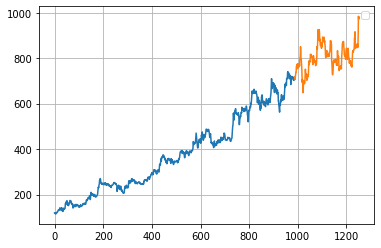

In [ ]:
#Plotting function
def Plotting(train, test, Stock = 1):

    if (isinstance(train, np.ndarray) == False):
        train = train.values
    if (isinstance(test, np.ndarray) == False):
        test = test.values

    train = train.T
    test = test.T
    plt.plot(np.arange(len(train[Stock])), train[Stock])
    plt.plot(np.arange(len(test[Stock]))+len(train[Stock]), test[Stock])
    plt.legend()
    plt.grid()
    plt.show()
    return None

Plotting(training_stock_dataframe, testing_stock_dataframe, Stock = 1)

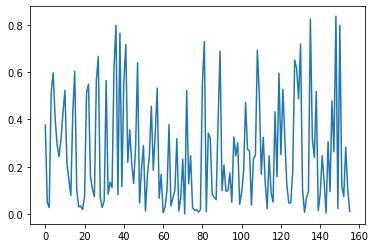

In [ ]:
plt.plot(scaled_training_stock_data[87])

In [ ]:
def mse(data):
    d = data.T
    d1 = np.tile(d, (d.shape[0],1,1))
    d2 = np.tile(d, (1,1,d.shape[0])).reshape(d.shape[0],d.shape[0],d.shape[1])
    
    mse = d1-d2
    mse = mse**2
    mse = np.mean(mse, 2)

    return mse

In [ ]:
mse_training_matrix = mse(scaled_training_stock_data)
mse_training_matrix

array([[0.        , 0.08461921, 0.15100682, ..., 0.05717763, 0.05777902,
        0.0544955 ],
       [0.08461921, 0.        , 0.04784603, ..., 0.06819122, 0.04357385,
        0.04791719],
       [0.15100682, 0.04784603, 0.        , ..., 0.0792341 , 0.12155958,
        0.13793432],
       ...,
       [0.05717763, 0.06819122, 0.0792341 , ..., 0.        , 0.11558564,
        0.09898851],
       [0.05777902, 0.04357385, 0.12155958, ..., 0.11558564, 0.        ,
        0.03009323],
       [0.0544955 , 0.04791719, 0.13793432, ..., 0.09898851, 0.03009323,
        0.        ]])

In [ ]:
mse_training_matrix.shape

(156, 156)

In [ ]:
#threshold = 0.010
#thresholds = [i/100 for i in range(1, 10)]

In [ ]:
thresholds = np.linspace(0.0025, 0.015, 11)
Pairs = []
print(thresholds)

[0.0025  0.00375 0.005   0.00625 0.0075  0.00875 0.01    0.01125 0.0125
 0.01375 0.015  ]


In [ ]:
for t in thresholds:
  a = np.where(mse_training_matrix < t, mse_training_matrix, 4)
  arr_x = []
  arr_y = []
  mse_pairs = []
  for i in range(a.shape[0]):
    for j in range(i+1, a.shape[1]):
      if (a[i][j] != 4):
        arr_x.append(i)
        arr_y.append(j)
  arr_x = np.array(arr_x)
  pairs = [[i, j] for i, j in zip(arr_x, arr_y)]
  Pairs.append(pairs)

NameError: ignored

In [ ]:
#BACKTESTING
def backtesting2(training , testing , pairs , entry=2.5 , exit=1 , stoploss=100):
  import numpy as np
  import matplotlib.pyplot as plt
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import mean_squared_error, r2_score

  total_trades=0

  r = []

  for pair in pairs:  
    x = training.iloc[:,pair[0]].to_numpy()
    y = training.iloc[:,pair[1]].to_numpy()
    x = [[i] for i in x]
    regression_model = LinearRegression()

    regression_model.fit(x, y)

    y_predicted = regression_model.predict(x)
    residuals_train = y - y_predicted
    std_error = np.std(residuals_train)
    slope = regression_model.coef_
    intercept = regression_model.intercept_

    x2 = testing.iloc[:,pair[0]].to_numpy()
    y2 = testing.iloc[:,pair[1]].to_numpy()

    residue2 = (y2 - (slope*x2 + intercept))
    residueAll = np.append(residuals_train, residue2)
    
    score = []
    for i in range(len(residue2)):
      score.append(residue2[i]/(np.std(residueAll[:len(residuals_train)+1+i])))        ##

    #Trading in Testing period

    positionL=0
    positionS=0
    
    #sell_y = []
    #buy_y = []
    #sell_x = []
    #buy_x = []
    returns=1
    buyxL=0
    sellyL=0
    buyyS=0
    sellxS=0

    for i in range(len(score)-1):
      if score[i] > entry and positionL != 1:
        
        buyxL = x2[i+1]
        sellyL = y2[i+1]

        #sell_y.append(y2[i+1])
        #buy_x.append(x2[i+1])
        
        positionL=positionL+1

      elif (score[i] < exit or score[i] > stoploss) and positionL == 1:
        
        returns = returns*(1+(slope * (x2[i+1] - buyxL) + sellyL - y2[i+1])/(slope*buyxL + sellyL))
        
        #buy_y.append(y2[i+1])
        #sell_x.append(x2[i+1])
        
        positionL=positionL-1

      if score[i] < -1*entry and positionS != 1:
        
        buyyS = y2[i+1]
        sellxS = x2[i+1]
        
        #buy_y.append(y2[i+1])
        #sell_x.append(x2[i+1])
        
        positionS=positionS+1

      elif (score[i] > -1*exit or score[i] < -1*stoploss) and positionS == 1:
        
        returns = returns * (1+(slope*(sellxS - x2[i+1]) + y2[i+1] - buyyS)/(slope*sellxS + buyyS))

        #sell_y.append(y2[i+1])
        #buy_x.append(x2[i+1])
        positionS=positionS-1   
    #sell_y = np.array(sell_y)
    #buy_y = np.array(buy_y)
    #sell_x = np.array(sell_x)
    #buy_x = np.array(buy_x)
    #returns_y =  np.sum(sell_y) - np.sum(buy_y) -0.001 * (np.sum(sell_y) + np.sum(buy_y))
    #returns_x =  np.sum(sell_x) - np.sum(buy_x) -0.001 * (np.sum(sell_x) + np.sum(buy_x))
    #total_buy =  slope*(np.sum(sell_x) + np.sum(buy_x)) + np.sum(sell_y) + np.sum(buy_y)
    #total_length = len(sell_y) + len(buy_y) + slope*(len(sell_x) + len(buy_x))
    #avg_spent = total_buy / total_length
    #returns = (returns_y + slope* returns_x)/avg_spent

    r.append(returns)

    #print(returns)
    # #Presentation  
    
    # print(testing.T.index[pair[0]][9:-3] + " and " + testing.T.index[pair[1]][9:-3])

    # plt.figure(figsize=(20,20))
    # score.plot(label='standard error')
    # plt.axvline(y=entry, color='green')
    # plt.axvline(y=-1*entry, color='green')
    # plt.axvline(y=exit, color='red')
    # plt.axvline(y=-1*exit, color='red')
    # plt.axvline(y=stoploss, color='yellow')
    # plt.axvline(y=-1*stoploss, color='yellow')

    # print("Total returns is " + returns + "%")
  #print(r)


  ## w/l ratio
  w = 0
  l = 0
  for ret in r:                   
    if(1-ret>0):
      w += 1
    elif (1-ret<0):
      l += 1
  if(l!=0):
    wl = w/l
  else:   #only wins no losses
    wl = w 

  ### net returns
  if(len(r)>0):
    netret = 0
    for ret in r:
      netret += ret
    netr = netret/len(r)-1
  else:   #in case of 0 profitable trades
    netr = 0

  return netr, wl

In [ ]:
#entry- 2, 4 exit- 0, 2
# entry = np.linspace(2, 4, 21)
# exit = np.linspace(0, 2, 21)

entry = np.array([1.5])
exit = np.array([0.3])
entry, exit

(array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2,
        3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]))

In [ ]:
#### RUN THIS #####################################################################################
###################################################################################################
#### 
rets = []
wls = []
#r, wl = backtesting2(training_stock_dataframe, testing_stock_dataframe, Pairs[2])
for en in entry:
  arr = []
  arr_wl = []
  for ex in exit:
    arr1 = []
    arr1_wl = []
    for p in Pairs:
      r, wl = backtesting2(training_stock_dataframe, testing_stock_dataframe, p, entry=en, exit=ex)
      arr1.append(r)
      arr1_wl.append(wls)
    arr.append(arr1)
    arr_wl.append(arr1_wl)
  rets.append(arr)
  wls.append(arr_wl)

NameError: ignored

In [ ]:
import seaborn as sns        
sns.set_style("darkgrid")

/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:2832: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  order=order, subok=True, ndmin=ndmin)


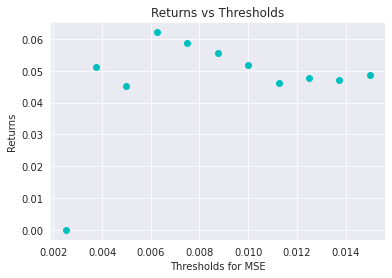

In [ ]:
plt.scatter(thresholds, rets, c='c')
plt.xlabel("Thresholds for MSE")
plt.ylabel("Returns")
plt.title("Returns vs Thresholds")
plt.show()

In [ ]:
plt.scatter(wls, rets, c='c')
plt.xlabel("Thresholds for MSE")
plt.ylabel("Win/Loss Ratios")
plt.title("Win Loss Ratios vs Threholds")
plt.show()